#### 자금유동시장

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
money = pd.read_excel('../../Data/finance/monetary_market.xlsx', index_col = 0) * 0.01
money

,bank_int_spread,m1_rate,m2_rate,lf_rate,liquidity,nonbank_deposit,deposit,nonbank_loan_rate,krw_deposit,sup_CD,finan_bonds,comp_loan,simple_loan,mortgage_loan,money_mort_loan
index,,,,,,,,,,,,,,,
2000-01,0.0144,0.395,0.032,0.061,0.059,6152.029,3264.410,0.1041,3264.410,84.283,197.844,0.0822,NaN,NaN,NaN
2000-02,0.0140,0.334,0.014,0.047,0.067,6033.768,3431.884,0.1020,3431.884,91.290,192.212,0.0824,NaN,NaN,NaN
2000-03,0.0155,0.346,0.023,0.050,0.083,6008.234,3477.103,0.1034,3477.103,85.186,195.560,0.0844,NaN,NaN,NaN
2000-04,0.0142,0.358,0.018,0.050,0.097,5888.403,3570.498,0.0914,3570.498,67.597,195.998,0.0820,NaN,NaN,NaN
2000-05,0.0156,0.288,0.011,0.050,0.090,5769.214,3639.533,0.1050,3639.533,51.743,192.457,0.0824,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05,0.0156,-0.138,0.023,0.028,0.022,34140.471,19268.615,0.0432,19268.615,665.895,2968.976,0.0520,0.0661,0.0421,0.0485
2023-06,0.0148,-0.140,0.022,0.025,0.027,33918.058,19682.326,0.0433,19682.326,663.140,2949.157,0.0532,0.0644,0.0426,0.0493
2023-07,0.0143,-0.122,0.025,0.029,0.021,34307.270,19449.080,0.0429,19449.080,690.415,3130.567,0.0525,0.0648,0.0428,0.0503


In [86]:
money[['nonbank_deposit','deposit','krw_deposit','sup_CD','finan_bonds']] =  np.log(money[['nonbank_deposit','deposit','krw_deposit','sup_CD','finan_bonds']] / 
       money[['nonbank_deposit','deposit','krw_deposit','sup_CD','finan_bonds']].shift(12)).dropna()

In [87]:
money.dropna(inplace = True)

In [88]:
money.index = pd.to_datetime(money.index)

In [89]:
money.drop(['m1_rate','m2_rate','lf_rate'], axis = 1)

,bank_int_spread,liquidity,nonbank_deposit,deposit,nonbank_loan_rate,krw_deposit,sup_CD,finan_bonds,comp_loan,simple_loan,mortgage_loan,money_mort_loan
index,,,,,,,,,,,,
2001-09-01,0.0236,0.138,0.061573,0.139166,0.0862,0.139166,0.275128,0.288039,0.0712,0.1060,0.0626,0.0751
2001-10-01,0.0250,0.131,0.065592,0.124099,0.0816,0.124099,0.153933,0.234449,0.0693,0.1025,0.0679,0.0822
2001-11-01,0.0234,0.127,0.068893,0.120125,0.0859,0.120125,0.318252,0.198045,0.0678,0.0986,0.0603,0.0686
2001-12-01,0.0220,0.134,0.091988,0.118633,0.0782,0.118633,0.418822,0.243155,0.0669,0.0990,0.0615,0.0624
2002-01-01,0.0211,0.132,0.058602,0.146279,0.0803,0.146279,0.466055,0.717700,0.0669,0.0981,0.0600,0.0660
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.0156,0.022,0.028173,0.003351,0.0432,0.003351,0.335958,-0.001412,0.0520,0.0661,0.0421,0.0485
2023-06-01,0.0148,0.027,0.032700,0.011059,0.0433,0.011059,0.341356,-0.011335,0.0532,0.0644,0.0426,0.0493
2023-07-01,0.0143,0.021,0.026461,0.010018,0.0429,0.010018,0.320609,0.021241,0.0525,0.0648,0.0428,0.0503


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = money.drop(['m1_rate','m2_rate','lf_rate','liquidity','deposit','money_mort_loan','comp_loan','nonbank_loan_rate'], axis = 1)
y = money['lf_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = False)

model = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00039583033426060185


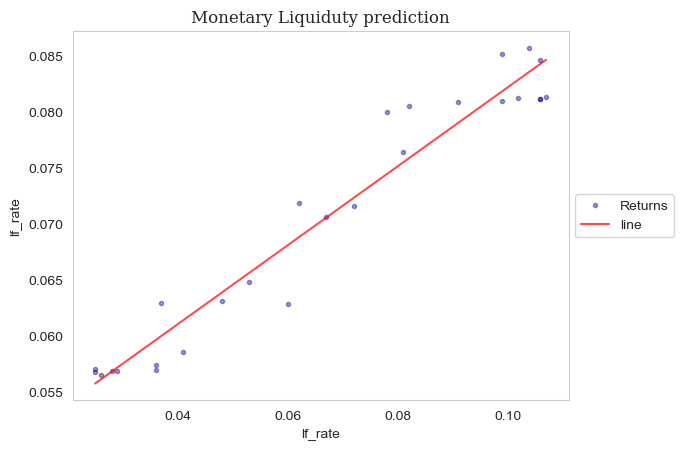

In [128]:
import seaborn as sns
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
#plt.axvline(0, color = 'grey', alpha = 0.5)
#plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Monetary Liquiduty prediction', fontfamily = 'Serif')
plt.grid(False)
plt.show()

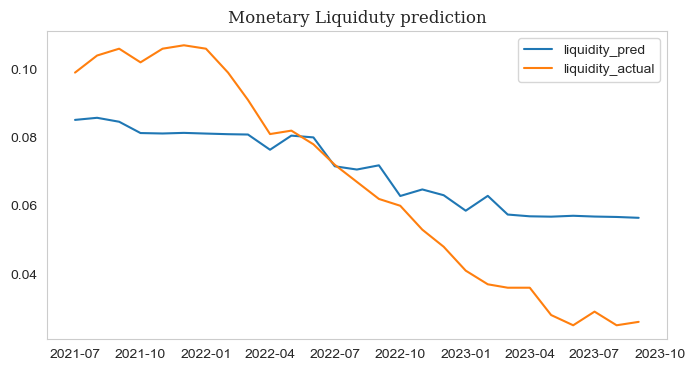

In [129]:
plt.figure(figsize = (8,4))
plt.plot(pd.Series(y_pred, index = X_test.index), label = 'liquidity_pred')
plt.plot(y_test, label = 'liquidity_actual')
plt.title('Monetary Liquiduty prediction', fontsize = 12, fontfamily = 'Serif')
plt.legend()
plt.grid(False)
plt.grid(False)

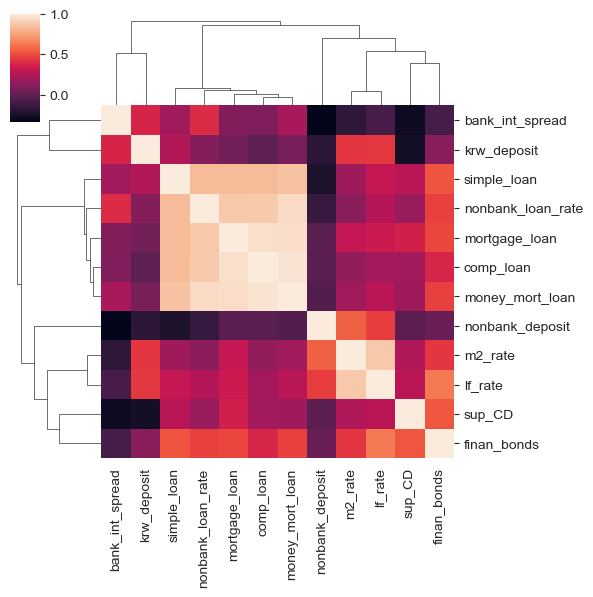

In [130]:
sns.clustermap(money.drop(['m1_rate','liquidity','deposit'], axis = 1).corr(), figsize = (6,6))

In [131]:
import shap

explainer_randomforest_reg = shap.TreeExplainer(model)

shap_values_train = explainer_randomforest_reg(X_train)
shap_values_test = explainer_randomforest_reg(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


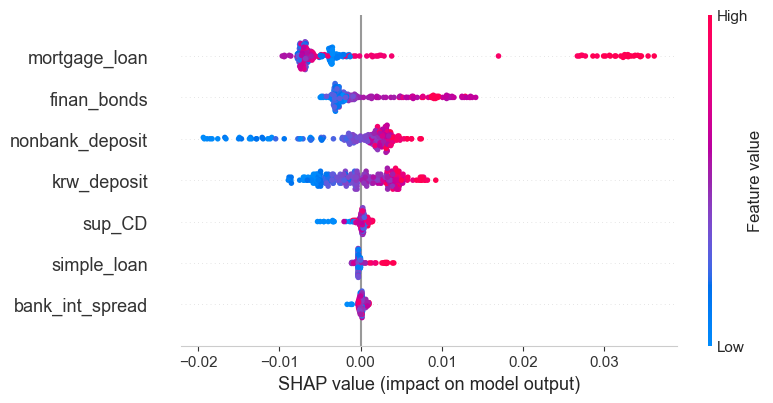

In [132]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


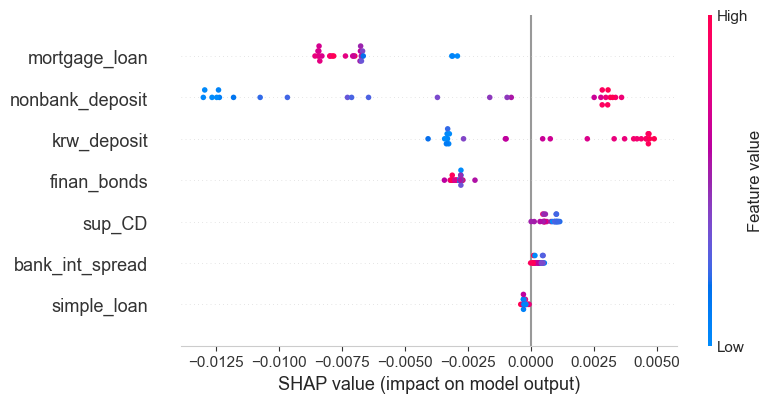

In [133]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [134]:
# money.to_csv('../../Cleaned_Data/monetary_market.csv')